In [1]:
import pandas as pd
import numpy as np


In [2]:
import os


In [3]:
os.getcwd()

'/home/ilya/1_Study/Diploma/Input-Output_tables'

In [4]:

# Изменяем текущую директорию на 'data'
os.chdir("data")

# Проверяем, что директория изменилась
print("Текущая директория изменена на:", os.getcwd())

Текущая директория изменена на: /home/ilya/1_Study/Diploma/Input-Output_tables/data


## Data preparation

In [5]:

# Читаем конкретный лист по имени
start_year = 2017
end_year = 2023

dict_iot = dict()
for year in range(start_year, end_year+1):
    file_name = f"./IOT/{year}.xlsx"
    sheet_name = '6.'

    df_year =  pd.read_excel(file_name, sheet_name=sheet_name, index_col=0)
    dict_iot[year] = df_year

In [6]:
dict_iot.keys()

dict_keys([2017, 2018, 2019, 2020, 2021, 2022, 2023])

## Get 2rd quadrant

In [8]:
indexes_2q = list(range(70,73+1)) + [78, 79]
indexes_2q

[70, 71, 72, 73, 78, 79]

In [9]:
last_num = 69 + 1

In [10]:
tmp = dict_iot[2017]
tmp.iloc[2:last_num, indexes_2q]

,Использование продукции в отраслях экономики,Расходы на конечное потребление домашних хозяйств,"Расходы на конечное потребление органов государственного управления, всего",Расходы на конечное потребление НКООДХ,"Валовое накопление, всего",Экспорт товаров и услуг
1,1.218877e+09,2.682480e+09,7.189875e+07,0.0,2.517306e+08,3.446590e+08
2,1.501515e+07,1.998450e+06,3.352335e+07,0.0,-8.488420e+05,1.013370e+06
3,2.047656e+06,9.953788e+07,0.000000e+00,0.0,4.981360e+05,1.008490e+05
4,1.404036e+08,2.253533e+08,0.000000e+00,0.0,1.826941e+06,1.258471e+08
5,8.342245e+08,0.000000e+00,0.000000e+00,0.0,1.276251e+09,7.756236e+09
...,...,...,...,...,...,...
64,1.570222e+07,2.268414e+08,1.023722e+09,3862408.0,0.000000e+00,0.000000e+00
65,0.000000e+00,1.874484e+06,3.631236e+07,161349.0,0.000000e+00,0.000000e+00
66,2.460900e+07,2.847760e+08,1.876129e+08,0.0,2.922786e+07,1.199540e+05
67,3.046891e+07,1.116051e+09,0.000000e+00,585639381.0,0.000000e+00,6.282294e+07


In [11]:
dict_df_2q = dict()
for year in dict_iot.keys():
    iot = dict_iot[year]
    tmp = iot.iloc[2:last_num, indexes_2q]
    tmp.fillna(0, inplace=True)  # Заменяем NaN на 0
    tmp = tmp.astype('int64')
    dict_df_2q[year] = tmp

In [12]:
dict_df_2q.keys()

dict_keys([2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [13]:
dict_df_2q[2017]

,Использование продукции в отраслях экономики,Расходы на конечное потребление домашних хозяйств,"Расходы на конечное потребление органов государственного управления, всего",Расходы на конечное потребление НКООДХ,"Валовое накопление, всего",Экспорт товаров и услуг
1,1218876512,2682479979,71898746,0,251730624,344659038
2,15015151,1998450,33523348,0,-848842,1013370
3,2047656,99537876,0,0,498136,100849
4,140403587,225353305,0,0,1826941,125847099
5,834224490,0,0,0,1276250679,7756235512
...,...,...,...,...,...,...
64,15702219,226841407,1023721818,3862408,0,0
65,0,1874484,36312357,161349,0,0
66,24609002,284775958,187612889,0,29227864,119954
67,30468909,1116051465,0,585639381,0,62822942


In [17]:
groups_by2q = {
    "Промышленное производство и бизнес-услуги": [
        (7, "Руды железные"),
        (8, "Руды металлов цветных"),
        (9, "Продукция горнодобывающей промышленности"),
        (10, "Услуги вспомогательные в области горнодобывающей промышленности"),
        (13, "Текстиль"),
        (16, "Древесина и изделия из древесины и пробки (кроме мебели), изделия из соломки и материалов для плетения"),
        (17, "Бумага и изделия бумажные"),
        (18, "Услуги по печатанию и воспроизведению"),
        (19, "Продукция печей коксовых"),
        (20, "Продукты переработки нефти"),
        (21, "Вещества химические и продукты химические"),
        (23, "Изделия резиновые и пластмассовые"),
        (24, "Изделия минеральные неметаллические прочие"),
        (25, "Металлы черные основные: железо, чугун, сталь и ферросплавы"),
        (26, "Трубы разных диаметров, профили полые и фитинги для труб разных диаметров из стали"),
        (27, "Изделия стальные прочие, полученные путем первичной обработки"),
        (29, "Услуги производства литейного"),
        (30, "Изделия металлические готовые, кроме машин и оборудования"),
        (38, "Услуги по ремонту и установке машин и оборудования"),
        (42, "Водоснабжение; канализационная система, услуги по сбору и удалению отходов"),
        (45, "Услуги по торговле оптовой, кроме торговли автомобилями и мотоциклами"),
        (47, "Услуги сухопутного транспорта и транспортирование по трубопроводам"),
        (48, "Услуги водного транспорта"),
        (50, "Услуги по хранению и услуги транспортные вспомогательные"),
        (54, "Услуги по информации"),
        (56, "Услуги финансовые, кроме услуг по страхованию и обеспечению пенсионному"),
        (58, "Услуги вспомогательные по отношению к финансовому посредничеству и страхованию"),
        (60, "Услуги профессиональные, научные и технические"),
        (61, "Услуги в области административного и вспомогательного обслуживания")
    ],
    "Потребительские товары и услуги": [
        (1, "Продукция сельского хозяйства, охоты и сопутствующие услуги"),
        (3, "Рыба и продукция рыболовства прочая; аквакультура; услуги вспомогательные в области рыболовства"),
        (4, "Уголь каменный и лигнит"),
        (11, "Продукты пищевые и напитки"),
        (12, "Изделия табачные"),
        (14, "Предметы одежды"),
        (15, "Кожа и изделия, относящиеся к ней"),
        (22, "Продукты фармацевтические и препараты фармацевтические основные"),
        (36, "Мебель"),
        (46, "Услуги по торговле розничной, за исключением автомобилями и мотоциклами"),
        (53, "Услуги по предоставлению продуктов питания и напитков"),
        (55, "Услуги связи"),
        (59, "Услуги, связанные с имуществом недвижимым"),
        (66, "Услуги в области искусства, развлечений и отдыха"),
        (67, "Услуги прочие"),
        (68, "Услуги домашних хозяйств, нанимающих домашнюю прислугу и услуги по производству товаров и услуг для собственного потребления")
    ],
    "Государственные и социальные услуги": [
        (2, "Продукция лесного хозяйства, лесозаготовок и услуг в этих областях"),
        (62, "Услуги в области государственного управления и обороны; услуги по обязательному социальному обеспечению"),
        (63, "Услуги в области образования"),
        (64, "Услуги в области здравоохранения"),
        (65, "Услуги социальные")
    ],
    "Инвестиционные товары и капитальное строительство": [
        (31, "Компьютеры, продукция электронная и оптическая"),
        (32, "Оборудование электрическое"),
        (33, "Машины и оборудование, не включенные в другие группировки"),
        (34, "Автомобили, прицепы и полуприцепы"),
        (35, "Оборудование транспортное прочее"),
        (37, "Изделия готовые прочие"),
        (43, "Здания и работы строительные"),
        (44, "Услуги по торговле оптовой и розничной; услуги по ремонту автомобилей и мотоциклов")
    ],
    "Экспортно-ориентированные сырьевые отрасли": [
        (5, "Нефть сырая"),
        (6, "Газ природный в жидком или газообразном состоянии"),
        (28, "Металлы драгоценные основные и металлы цветные прочие"),
    ],
    "Инфраструктура и коммунальные услуги": [
        (39, "Услуги по производству и распределению электроэнергии"),
        (40, "Газ отопительный; услуги по распределению топлива газообразного трубопроводного"),
        (41, "Услуги по снабжению паром и воздухом охлажденным"),
        (49, "Услуги воздушного транспорта"),
        (51, "Услуги почтовые и курьерские"),
        (52, "Услуги по организации проживания"),
        (57, "Услуги по страхованию, перестрахованию и пенсионному обеспечению, кроме услуг по обязательному социальному обеспечению")
    ]
}

In [18]:
# для соотнесения индексов из таблицы и индексов в питоне
shift = 1

In [19]:
# Создаем словарь с названиями групп и соответствующими индексами колонок
groups_by2q_index = { name : [item[0] - shift for item in group_items] for name, group_items in groups_by2q.items()}


In [20]:
tmp = dict_df_2q[2017]


# Создаем новый DataFrame с суммами по каждой группе
dict_df_2q_aggr = dict()
dict_df_2q_aggr_norm_col = dict()
#dict_df_2q_aggr_norm_row = dict()


for year in dict_df_2q.keys():
    df_2q_aggr = pd.DataFrame(columns=tmp.columns.to_list())
    df_2q_aggr_norm_col = pd.DataFrame(columns=tmp.columns.to_list())
    tmp = dict_df_2q[year]
    for group_name, rows in groups_by2q_index.items():
        df_2q_aggr.loc[group_name] = tmp.iloc[rows, :].sum(axis=0)
        

    dict_df_2q_aggr[year] = df_2q_aggr
    row_sums = np.sum(df_2q_aggr, axis=1)
    normalized_df = df_2q_aggr.div(row_sums, axis=0).fillna(0)
    normalized_df[normalized_df < 0] = 0
    dict_df_2q_aggr_norm_col[year] = normalized_df


In [21]:
dict_df_2q_aggr_norm_col[2017]
#dict_df_2q_aggr[2017]


,Использование продукции в отраслях экономики,Расходы на конечное потребление домашних хозяйств,"Расходы на конечное потребление органов государственного управления, всего",Расходы на конечное потребление НКООДХ,"Валовое накопление, всего",Экспорт товаров и услуг
Промышленное производство и бизнес-услуги,0.631227,0.128397,0.015739,0.000000,0.087735,0.136902
Потребительские товары и услуги,0.172984,0.719013,0.010908,0.024616,0.026909,0.045570
Государственные и социальные услуги,0.006144,0.187185,0.805365,0.001278,0.000000,0.000173
Инвестиционные товары и капитальное строительство,0.172205,0.110518,0.011587,0.000000,0.680197,0.025493
Экспортно-ориентированные сырьевые отрасли,0.149632,0.001074,0.000000,0.000000,0.139243,0.710051
Инфраструктура и коммунальные услуги,0.493164,0.448603,0.000276,0.000000,0.000002,0.057954


In [22]:
with pd.ExcelWriter('2quadrant_aggr_normalized_by2q.xlsx') as writer:
    for key, value in  dict_df_2q_aggr_norm_col.items():
        value.to_excel(writer, sheet_name=str(key))

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


In [23]:
with pd.ExcelWriter('2quadrant_aggr_by2q.xlsx') as writer:
    for key, value in  dict_df_2q_aggr.items():
        value.to_excel(writer, sheet_name=str(key))

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


## Get 3rd quadrant

-2 for indexes from excel(1 for numeration from 0 in python, 1 for title)

In [24]:
indexes_3q = list(range(74,78+1)) + [81]
indexes_3q

[74, 75, 76, 77, 78, 81]

bounds for main part(A)
2:69+1

In [25]:
last_num = 69 + 1

In [26]:
tmp = dict_iot[2017]
tmp

,Unnamed: 1,Unnamed: 2,"Продукция сельского хозяйства, охоты и связанные с этим услуги","Продукция лесного хозяйства, лесозаготовок и услуг в этих областях",Рыба и продукция рыболовства прочая; аквакультура; услуги вспомогательные в области рыболовства,Уголь каменный и лигнит,Нефть сырая,Газ природный в жидком или газообразном состоянии,Руды железные,Руды металлов цветных,...,"Расходы на конечное потребление органов государственного управления, всего",Расходы на конечное потребление НКООДХ,"Конечное потребление, всего",Валовое накопление основного капитала,Изменение запасов материальных оборотных средств,Приобретение минус выбытие ценностей,"Валовое накопление, всего",Экспорт товаров и услуг,Конечный спрос,Общий спрос на товары и услуги
NaN,код,NaN,1,2,3,5,61,62,71,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
№,NaN,NaN,1,2,3,4,5,6,7,8,...,71.0,72.0,7.300000e+01,74.0,75.0,76.0,77.0,78.0,7.900000e+01,8.000000e+01
1,01,"Продукция сельского хозяйства, охоты и связанн...",461672857,0,0,0,17638,0,0,0,...,71898746.0,0.0,2.754379e+09,87225842.0,164504782.0,0.0,251730624.0,344659038.0,3.350768e+09,4.569645e+09
2,02,"Продукция лесного хозяйства, лесозаготовок и у...",144315,6108690,0,53927,0,0,0,0,...,33523348.0,0.0,3.552180e+07,0.0,-848842.0,0.0,-848842.0,1013370.0,3.568633e+07,5.070148e+07
3,03,Рыба и продукция рыболовства прочая; аквакульт...,1894,0,317,0,2,0,0,0,...,0.0,0.0,9.953788e+07,0.0,498136.0,0.0,498136.0,100849.0,1.001369e+08,1.021845e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,"Прибыль, смешанный доход",1489107038,3250443,74077028,82907593,3218367106,92830535,97891837,447141516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,Валовая добавленная стоимость,2353207687,26697195,79058750,256808032,5621312824,164124810,217822104,1235724135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,Выпуск в основных ценах,4168134624,46340935,99847424,484583500,9861852700,287933900,443892800,2468950900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,Импорт товаров и услуг,401510275,4360542,2337093,8847432,4857981,130250187,12790555,266037379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
tmp.iloc[indexes_3q, 1]

73                      Использовано в ценах покупателя
74                                         Оплата труда
75    Другие налоги на производство за вычетом субсидий
76                       Потребление основного капитала
77                             Прибыль, смешанный доход
80                               Импорт товаров и услуг
Name: Unnamed: 2, dtype: object

In [28]:
dict_df_3q = dict()
for year in dict_iot.keys():
    iot = dict_iot[year]
    tmp = iot.iloc[indexes_3q, 2:last_num]
    tmp.fillna(0, inplace=True)  # Заменяем NaN на 0
    tmp = tmp.astype('int64')
    dict_df_3q[year] = tmp

In [29]:
dict_df_3q.keys()

dict_keys([2017, 2018, 2019, 2020, 2021, 2022, 2023])

Агрегация в большие области

In [30]:
def aggregation_big_sph(A, Y, agr_list):
    s = len(agr_list)
    B = np.zeros([s, s])
    Y_new = np.zeros(s)
    for (k, num_i) in enumerate(agr_list):
        for (l, num_j) in enumerate(agr_list):
            x_j = Y[num_j]
            tmp = A[num_i, :]
            a_ij = tmp[:, num_j]
            B[k, l] = np.sum(a_ij @ x_j) / np.sum(x_j)
        x_j = Y[num_i]
        Y_new[k] = np.sum(x_j)
    return B, Y_new


In [31]:
tmp = dict_df_3q[2017]

# Создаем новый DataFrame с суммами по каждой группе
dict_df_3q_aggr = dict()
dict_df_3q_aggr_norm_col = dict()
#dict_df_3q_aggr_norm_row = dict()
for year in dict_df_3q.keys():
    df_3q_aggr = pd.DataFrame(index=tmp.index)
    df_3q_aggr_norm_col = pd.DataFrame(index=tmp.index)
    tmp = dict_df_3q[year]
    for group_name, columns in groups_by2q_index.items():
        df_3q_aggr[group_name] = tmp.iloc[:, columns].sum(axis=1)
        
        
    dict_df_3q_aggr[year] = df_3q_aggr

    row_sums = np.sum(df_3q_aggr, axis=0)
    
    normalized_df = df_3q_aggr.div(row_sums, axis=1).fillna(0)
    normalized_df[normalized_df < 0] = 0

    dict_df_3q_aggr_norm_col[year] = normalized_df


In [32]:
dict_df_3q_aggr_norm_col[2023]

,Промышленное производство и бизнес-услуги,Потребительские товары и услуги,Государственные и социальные услуги,Инвестиционные товары и капитальное строительство,Экспортно-ориентированные сырьевые отрасли,Инфраструктура и коммунальные услуги
73,0.317004,0.293495,0.471663,0.305090,0.438054,0.461096
74,0.189016,0.136478,0.349684,0.117521,0.110355,0.184821
75,0.006891,0.000000,0.016878,0.002814,0.012618,0.008441
76,0.047072,0.053325,0.075704,0.025527,0.101020,0.066855
77,0.298132,0.381131,0.082146,0.129174,0.317642,0.204525
80,0.141886,0.137959,0.003925,0.419875,0.020311,0.074262


In [33]:
dict_df_3q_aggr_norm_col[2020]

,Промышленное производство и бизнес-услуги,Потребительские товары и услуги,Государственные и социальные услуги,Инвестиционные товары и капитальное строительство,Экспортно-ориентированные сырьевые отрасли,Инфраструктура и коммунальные услуги
73,0.322241,0.282966,0.549852,0.279584,0.412026,0.412761
74,0.184977,0.170873,0.297769,0.113742,0.108002,0.260239
75,0.005985,0.003230,0.009494,0.001709,0.040285,0.008089
76,0.049445,0.058265,0.063349,0.028262,0.098523,0.089805
77,0.294921,0.386955,0.074091,0.126751,0.297290,0.194051
80,0.142432,0.097712,0.005445,0.449952,0.043874,0.035056


In [34]:
with pd.ExcelWriter('3quadrant_aggr_normalized_by2q.xlsx') as writer:
    for key, value in  dict_df_3q_aggr_norm_col.items():
        value.to_excel(writer, sheet_name=str(key), index=False)

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


In [35]:
with pd.ExcelWriter('3quadrant_aggr_by2q.xlsx') as writer:
    for key, value in  dict_df_3q_aggr.items():
        value.to_excel(writer, sheet_name=str(key), index=False)

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


Процентное изменение оплаты труда :
Экспортно-ориентированные сырьевые отрасли: 25.89%
Промышленное производство и бизнес-услуги: 12.68%
Государственные и социальные услуги: 8.36%
Инвестиционные товары и капитальное строительство: 5.54%
Потребительские товары и услуги: -20.69%
Инфраструктура и коммунальные услуги: -22.20%

Процентное изменение импорта :
Государственные и социальные услуги: 428.52%
Инфраструктура и коммунальные услуги: 121.85%
Потребительские товары и услуги: 44.87%
Экспортно-ориентированные сырьевые отрасли: 16.84%
Инвестиционные товары и капитальное строительство: -3.89%
Промышленное производство и бизнес-услуги: -4.78%


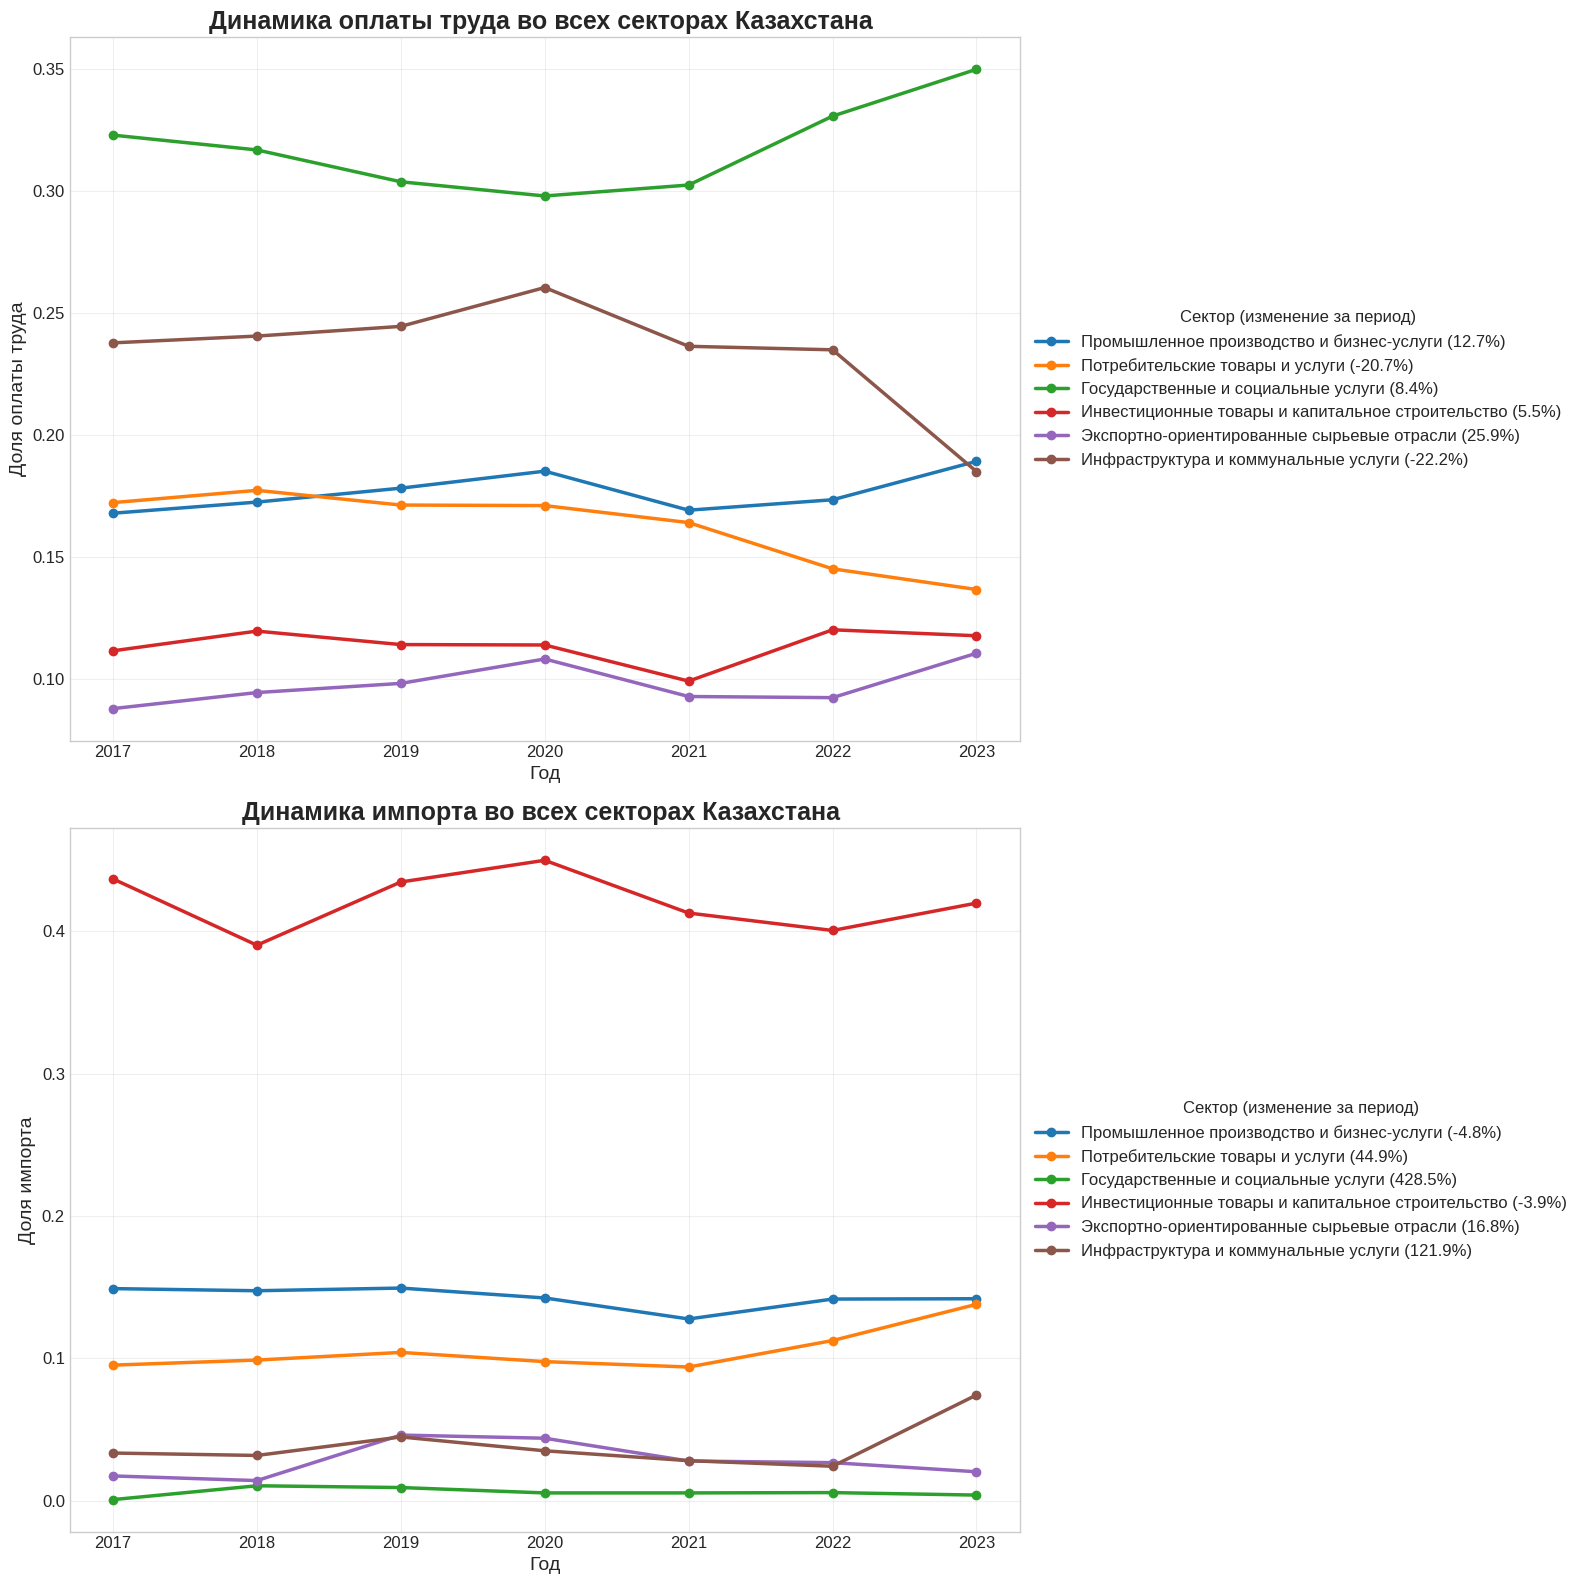

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Настройка стиля для графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Загрузка данных из Excel файла
def load_data_from_excel(file_path):
    # Чтение всех листов (годов) из файла
    excel_data = pd.read_excel(file_path, sheet_name=None, header=0)
    years = sorted([int(year) for year in excel_data.keys()])
    
    # Извлечение данных по оплате труда (строка 2) и импорту (строка 6)
    labor_data = {}
    import_data = {}
    
    # Получаем названия секторов из первого листа
    first_sheet = excel_data[str(years[0])]
    sectors = first_sheet.columns.tolist()
    
    # Инициализируем словари для каждого сектора
    for sector in sectors:
        labor_data[sector] = []
        import_data[sector] = []
    
    # Заполняем данные для каждого года
    for year in years:
        sheet = excel_data[str(year)]
        
        # Оплата труда (строка 2, индекс 1)
        labor_row = sheet.iloc[1]
        
        # Импорт (строка 6, индекс 5)
        import_row = sheet.iloc[5]
        
        for sector in sectors:
            labor_data[sector].append(labor_row[sector])
            import_data[sector].append(import_row[sector])
    
    return years, sectors, labor_data, import_data

# Загружаем данные
years, sectors, labor_data, import_data = load_data_from_excel('3quadrant_aggr_normalized_by2q.xlsx')

# Создаем DataFrame для динамики оплаты труда
df_labor = pd.DataFrame(labor_data, index=years)

# Создаем DataFrame для динамики импорта
df_import = pd.DataFrame(import_data, index=years)

# Рассчитываем процентные изменения между 2017 и 2023
labor_percent_changes = {}
import_percent_changes = {}

for sector in sectors:
    labor_first = labor_data[sector][0]
    labor_last = labor_data[sector][-1]
    labor_percent_changes[sector] = ((labor_last - labor_first) / labor_first * 100)
    
    import_first = import_data[sector][0]
    import_last = import_data[sector][-1]
    import_percent_changes[sector] = ((import_last - import_first) / import_first * 100)

# Вывод процентных изменений для проверки
print("Процентное изменение оплаты труда :")
for sector, change in sorted(labor_percent_changes.items(), key=lambda x: x[1], reverse=True):
    print(f"{sector}: {change:.2f}%")

print("\nПроцентное изменение импорта :")
for sector, change in sorted(import_percent_changes.items(), key=lambda x: x[1], reverse=True):
    print(f"{sector}: {change:.2f}%")

# Определяем цвета для каждого сектора
colors = plt.cm.tab10.colors

# Дополнительно: создаем субграфики для лучшей читаемости
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

# Оплата труда
for i, sector in enumerate(sectors):
    axs[0].plot(years, df_labor[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({labor_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

axs[0].set_title('Динамика оплаты труда во всех секторах Казахстана ', 
          fontsize=18, fontweight='bold')
axs[0].set_xlabel('Год', fontsize=14)
axs[0].set_ylabel('Доля оплаты труда', fontsize=14)
axs[0].grid(True, alpha=0.3)
axs[0].legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
axs[0].set_xticks(years)

# Импорт
for i, sector in enumerate(sectors):
    axs[1].plot(years, df_import[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({import_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

axs[1].set_title('Динамика импорта во всех секторах Казахстана ', 
          fontsize=18, fontweight='bold')
axs[1].set_xlabel('Год', fontsize=14)
axs[1].set_ylabel('Доля импорта', fontsize=14)
axs[1].grid(True, alpha=0.3)
axs[1].legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
axs[1].set_xticks(years)

plt.tight_layout()
plt.savefig('labor_import_all_sectors_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

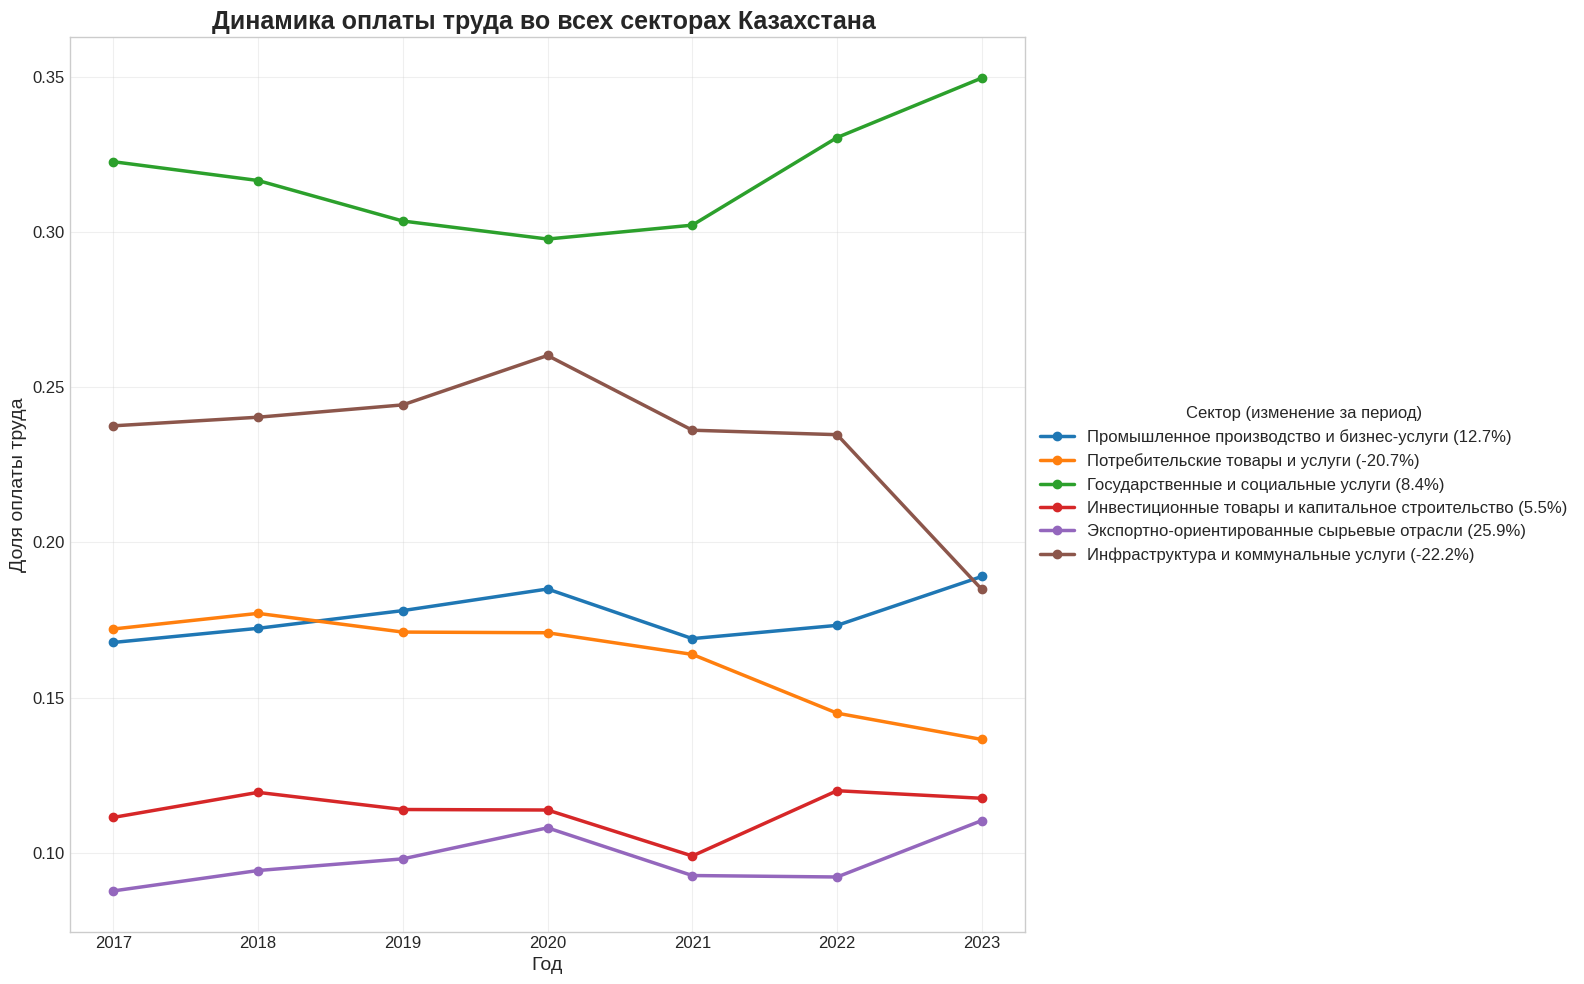

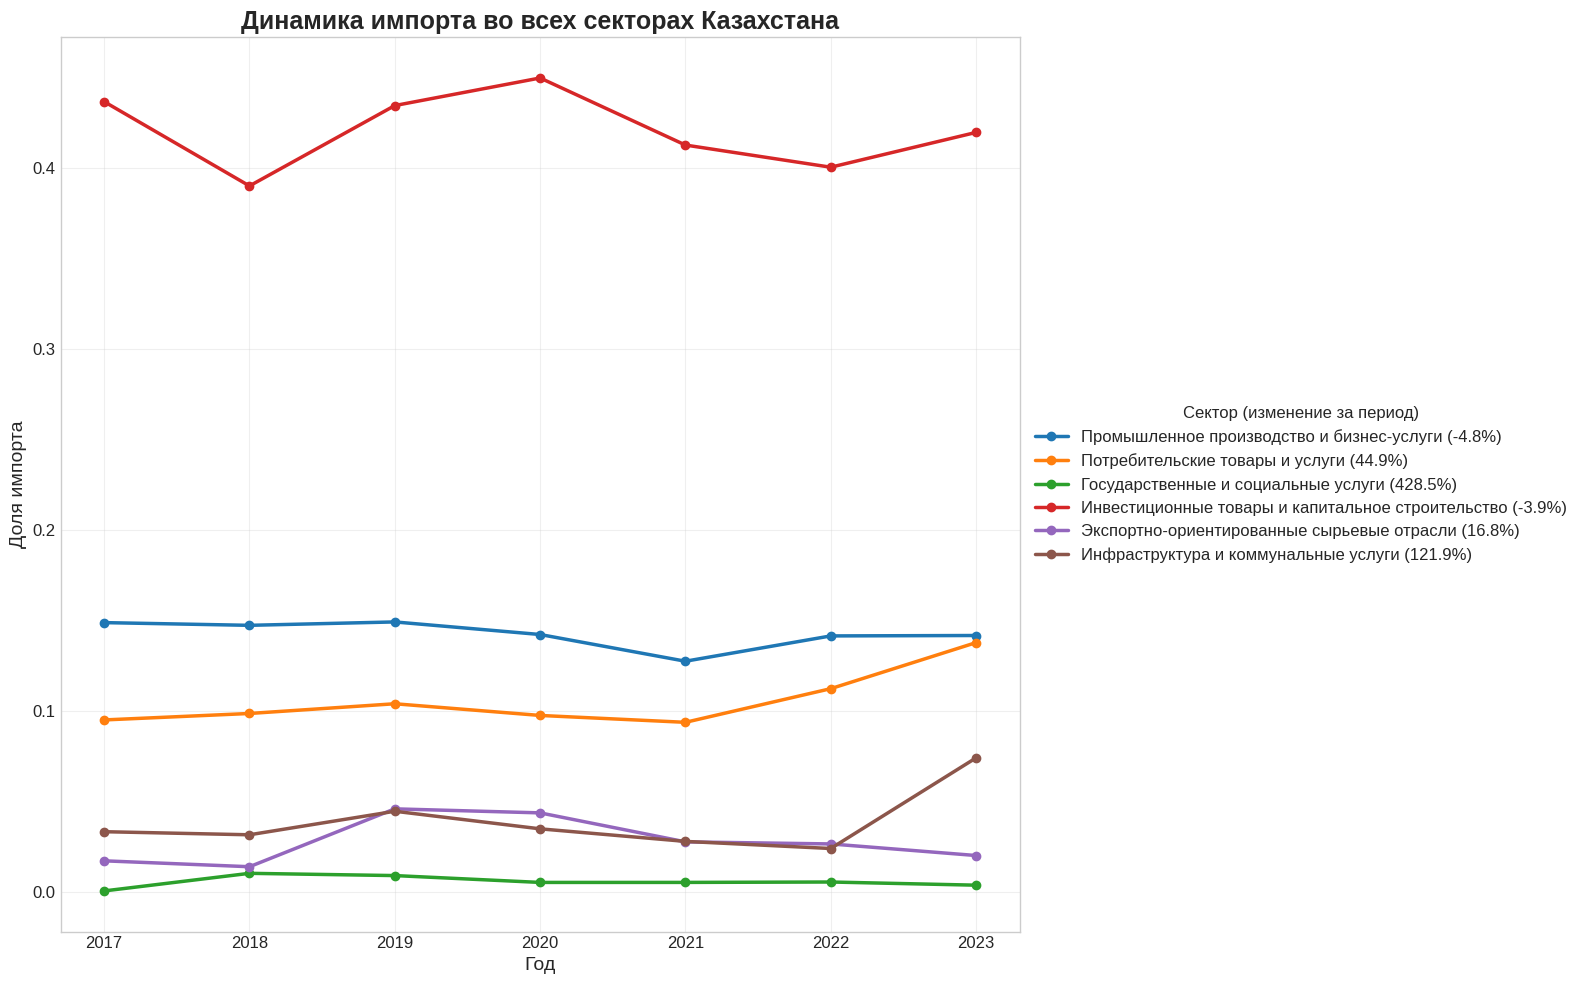

In [37]:

# Визуализация динамики оплаты труда для всех секторов
plt.figure(figsize=(16, 10))
for i, sector in enumerate(sectors):
    plt.plot(years, df_labor[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({labor_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

plt.title('Динамика оплаты труда во всех секторах Казахстана ', 
          fontsize=18, fontweight='bold')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Доля оплаты труда', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
plt.xticks(years)
plt.tight_layout()
plt.savefig('labor_all_sectors.png', dpi=300, bbox_inches='tight')
plt.show()

# Визуализация динамики импорта для всех секторов
plt.figure(figsize=(16, 10))
for i, sector in enumerate(sectors):
    plt.plot(years, df_import[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({import_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

plt.title('Динамика импорта во всех секторах Казахстана', 
          fontsize=18, fontweight='bold')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Доля импорта', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
plt.xticks(years)
plt.tight_layout()
plt.savefig('import_all_sectors.png', dpi=300, bbox_inches='tight')
plt.show()
